# __Data Preprocessing for Linear Regression__

## __Linear Model Assumption__

* **Linearity:**  This assumption states that the relationship between the independent variables (X) and the dependent variable (Y) is linear.  $Y = β0 + β1X1 + β2X2 + ... + ε$
* **Normality of residuals:** This assumption states that the errors $(ε)$ in the model are normally distributed with a mean of 0
* **No multicollinearity:** This assumption states that the independent variables $(X)$ in the model are not highly correlated with each other
* **Homoscedasticity:**  This assumption states that the variance of the errors $(ε)$ is constant across all levels of the independent variables $(X)$.




***
## Let's get started with Coding!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

## __Load California Housing Dataset__

In [2]:
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing = pd.DataFrame(data.data, columns=data.feature_names)
california_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
california_housing['Price'] = data.target
california_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
features = data.feature_names
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

***
## __Create a Reference Data__

In [7]:
california_housing.shape

(20640, 9)

In [8]:
np.random.seed(0)

n = california_housing.shape[0]
x = np.random.randn(n)
y = 10*x + np.random.randn(n)*2

demo_df = pd.DataFrame([x,y]).T

demo_df.columns = ['x', 'y']

demo_df.head()

,x,y
0,1.764052,16.066117
1,0.400157,2.081214
2,0.978738,12.901771
3,2.240893,22.398598
4,1.867558,21.877949


***
## __Checking Linear Assumptions for California Housing Dataset__

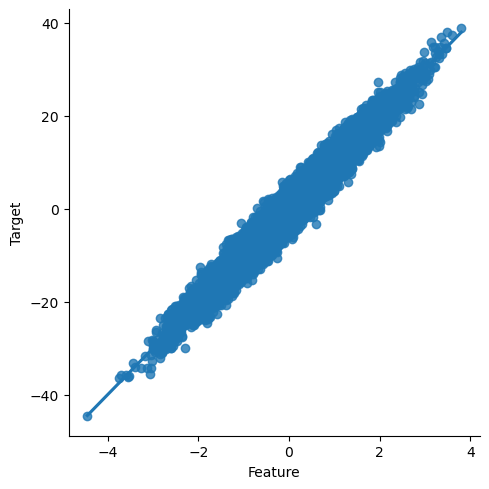

In [9]:
sns.lmplot(x='x', y='y', data=demo_df, order=1)
plt.ylabel('Target')
plt.xlabel('Feature')
plt.show()

In [10]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

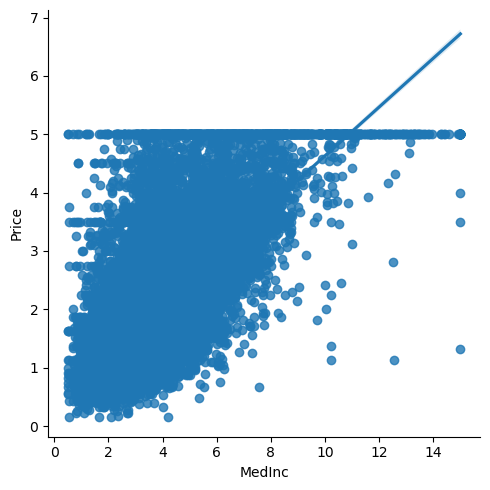

In [11]:
sns.lmplot(x='MedInc', y='Price', data=california_housing, order=1)

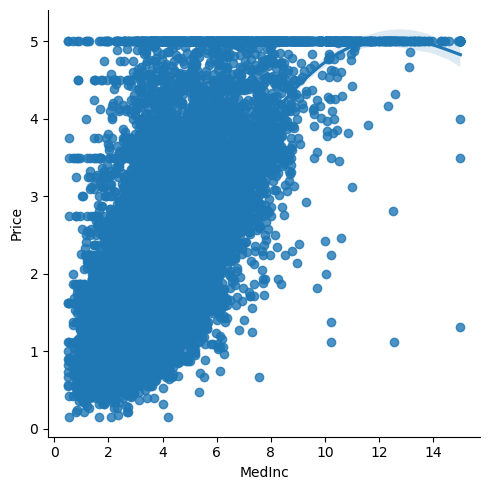

In [12]:
sns.lmplot(x='MedInc', y='Price', data=california_housing, order=5)

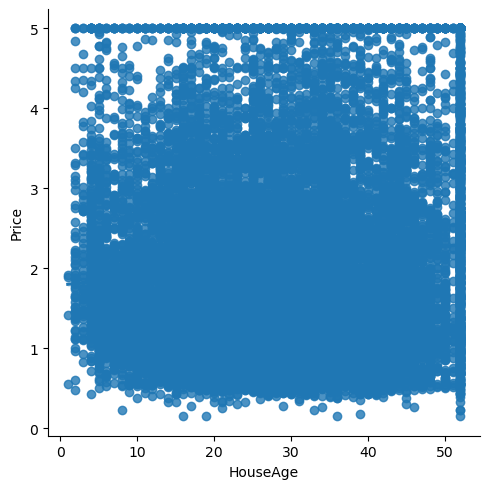

In [13]:
sns.lmplot(x='HouseAge', y='Price', data=california_housing, order=1)

***
## __Variable Transformation__

In [14]:
california_housing['log_MedInc'] = np.log(california_housing['MedInc'])

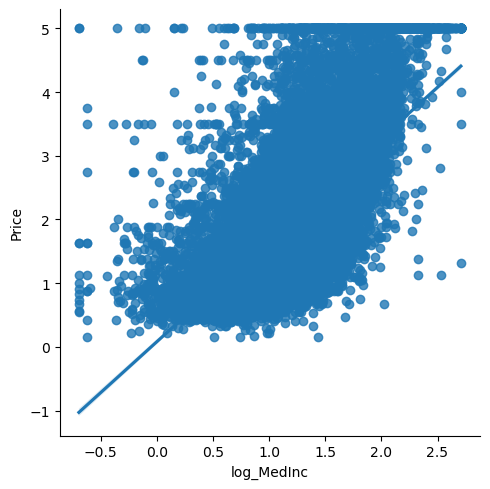

In [15]:
sns.lmplot(x='log_MedInc', y='Price', data=california_housing, order=1)


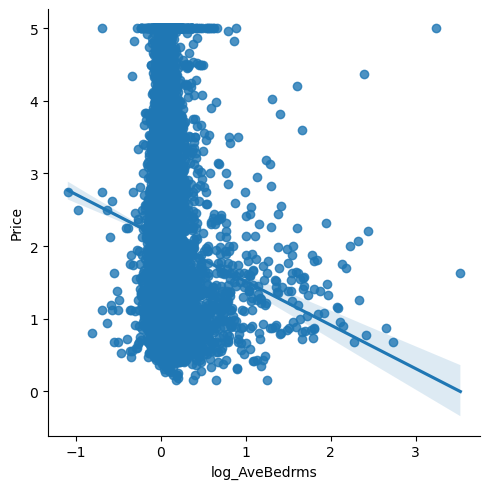

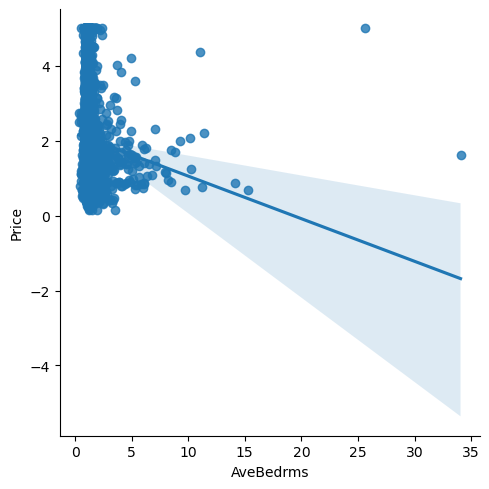

In [16]:
california_housing['log_AveBedrms'] = np.log(california_housing['AveBedrms'])
sns.lmplot(x='log_AveBedrms', y='Price', data=california_housing, order=1)
sns.lmplot(x='AveBedrms', y='Price', data=california_housing, order=1)

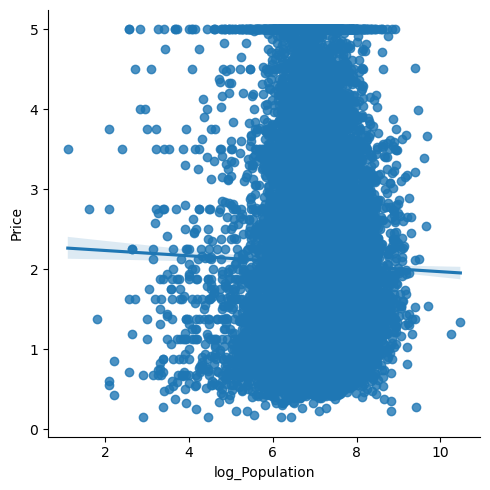

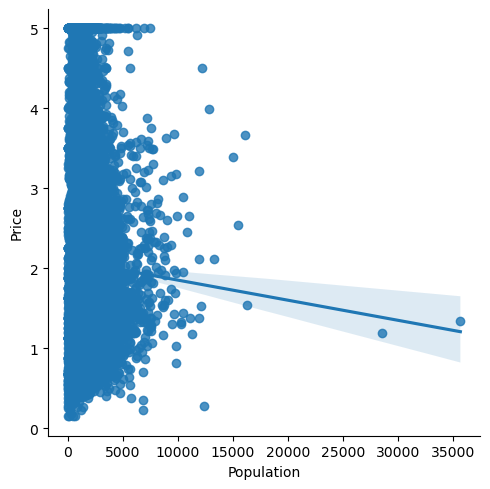

In [17]:
california_housing['log_Population'] = np.log(california_housing['Population'])
sns.lmplot(x='log_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

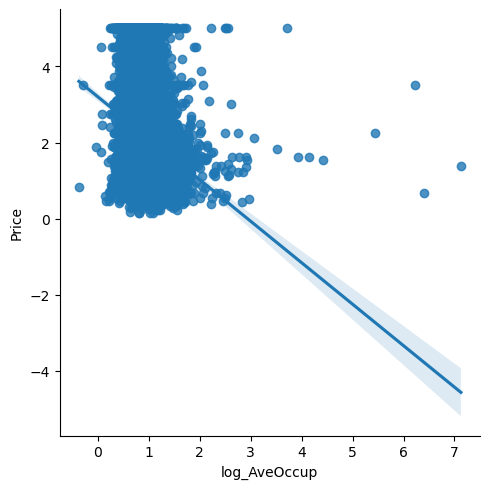

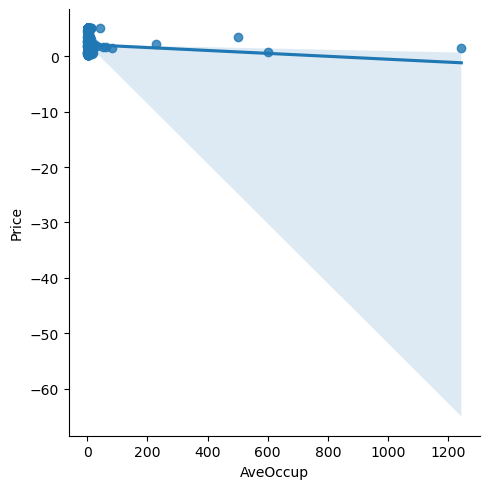

In [18]:
california_housing['log_AveOccup'] = np.log(california_housing['AveOccup'])
sns.lmplot(x='log_AveOccup', y='Price', data=california_housing, order=1)
sns.lmplot(x='AveOccup', y='Price', data=california_housing, order=1)

***
## __Variable Transformations__

## Data Transformations

Data transformations are techniques applied to modify the distribution of a variable, often aiming to achieve:

- Normality (or near-normality)
- Linearity in relationships
- Constant variance (homoscedasticity)
- Improved model fit and interpretability

**Common Transformation Types:**

1. **Logarithmic Transformation ($np.log(X)$):**
    - Compresses large values, reduces right-skewness, stabilizes variance.
    - Common use cases: Skewed income data, population distributions.
    - Example: Visualizing logarithmic price changes in stocks.

2. **Reciprocal Transformation ($1 / X$):**
    - Inverts values, flips distributions, handles outliers.
    - Common use cases: Rates, proportions, fractions.
    - Example: Analyzing reciprocal waiting times in a queue.

3. **Square Root Transformation ($sqrt(X)$):**
    - Moderately compresses large values, reduces right-skewness.
    - Common use cases: Count data, non-negative variables.
    - Example: Analyzing square root of counts for Poisson-like data.

4. **Exponential Transformation:**
    - Expands small values, corrects left-skewness.
    - Common use cases: Growth rates, time-series data.
    - Example: Modeling exponential growth of bacteria populations.

5. **Box-Cox Transformation:**
    - Flexible family of transformations with parameter λ for tailoring.
    - Common use cases: General normalization and linearization.
    - Example: Normalizing skewed financial data for analysis.

6. **Yeo-Johnson Transformation:**
    - Extension of Box-Cox, handles both positive and negative values.
    - Common use cases: Data with mixed signs, zero values.
    - Example: Transforming income data with both positive and negative incomes.

**Key Considerations:**

- **Interpretability:** Transformations can alter original meaning.
- **Back-transformation:** Reverse the transformation for prediction interpretation.
- **Domain-specific knowledge:** Guide appropriate transformation choices.
- **Visual inspection:** Assess transformation effectiveness using histograms and QQ-plots.


***
### __Reciprical Transformation__

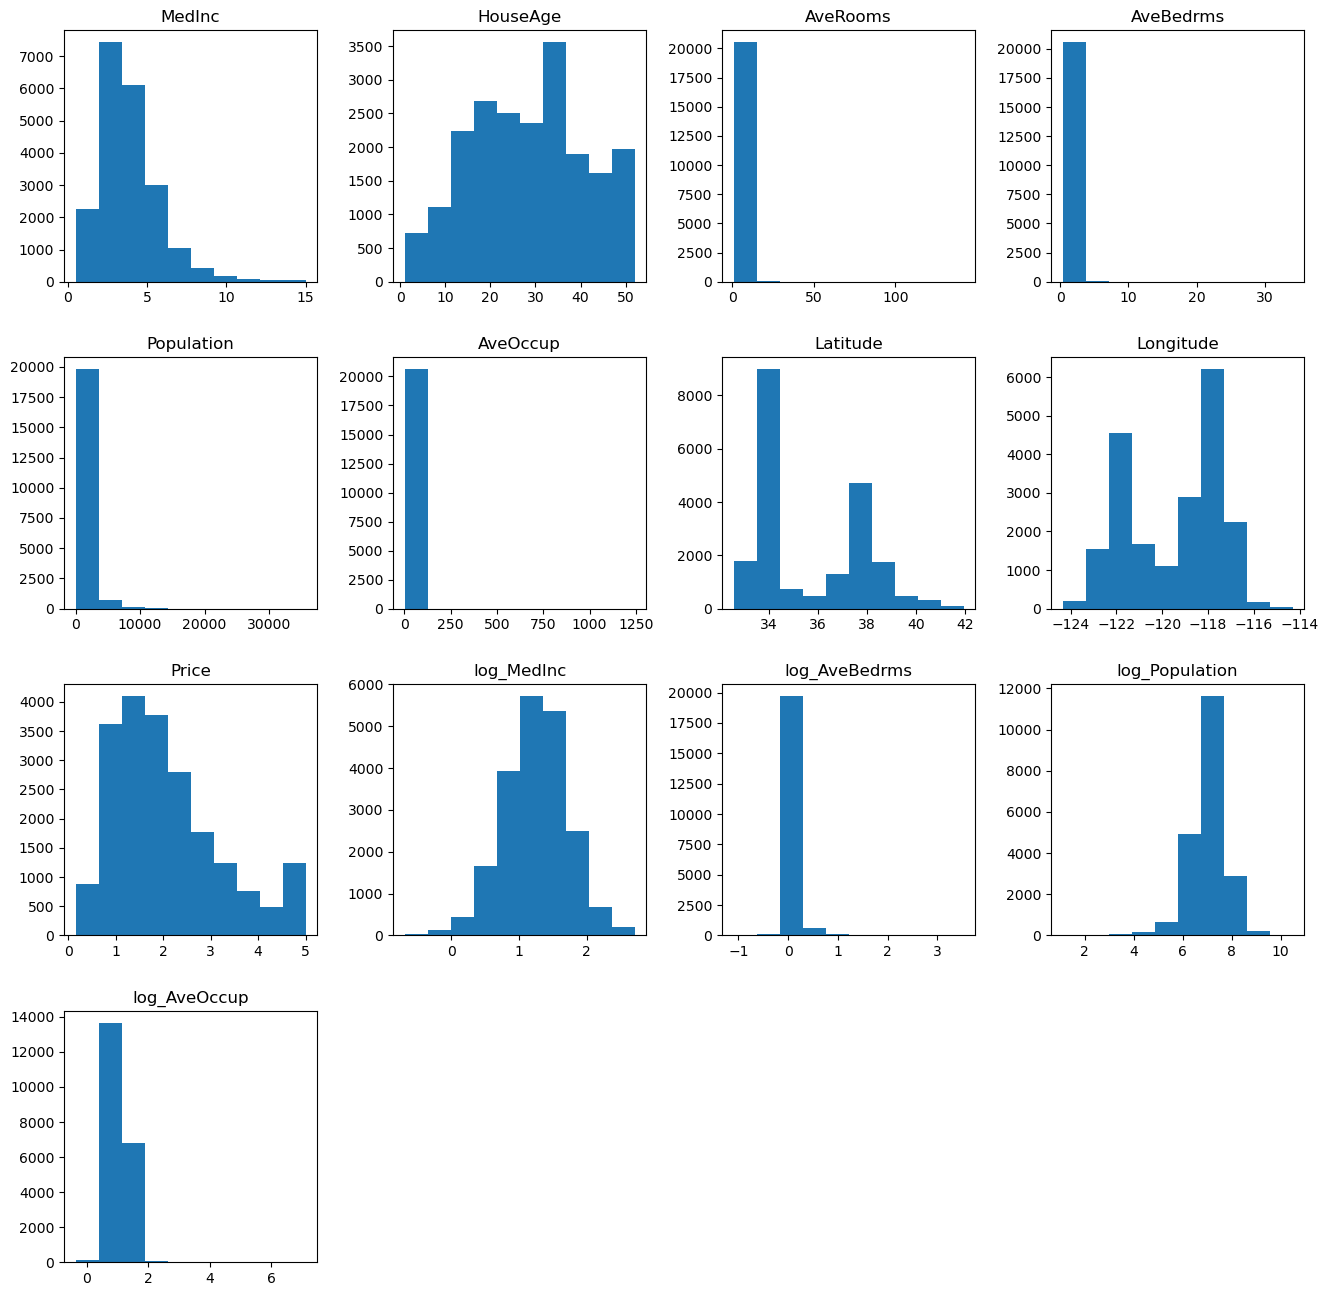

In [19]:
california_housing.hist(figsize=(16,16), grid=False)
plt.show()

california_housing['inv_Population'] = 1/(california_housing['Population'])
sns.lmplot(x='inv_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

***
## __Squareroot and Exponential Transformations__

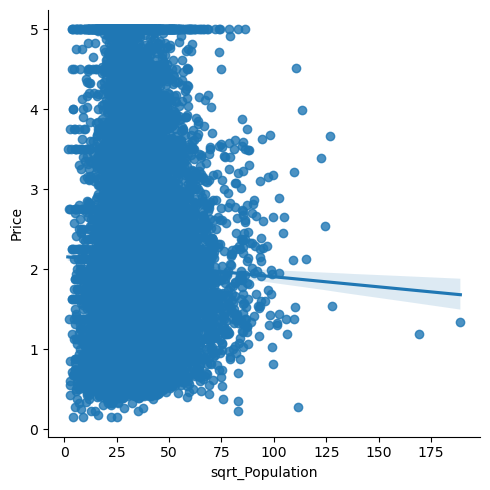

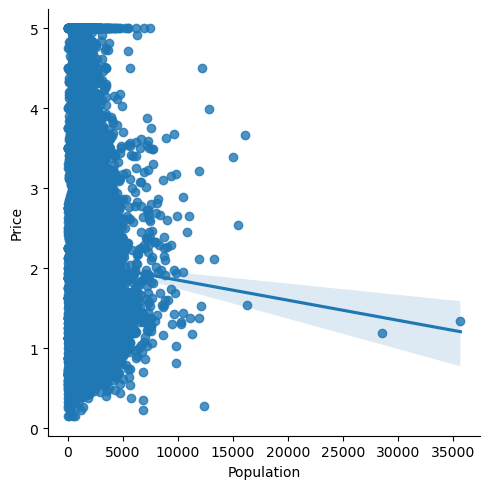

In [20]:
california_housing['sqrt_Population'] = np.sqrt((california_housing['Population']))
sns.lmplot(x='sqrt_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\matplotlib\ticker.py:2098: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\matplotlib\ticker.py:2098: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


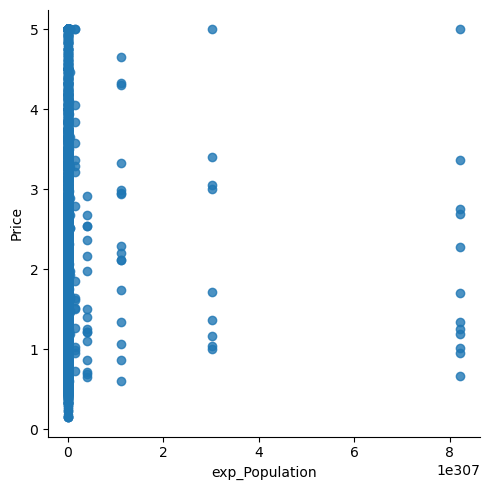

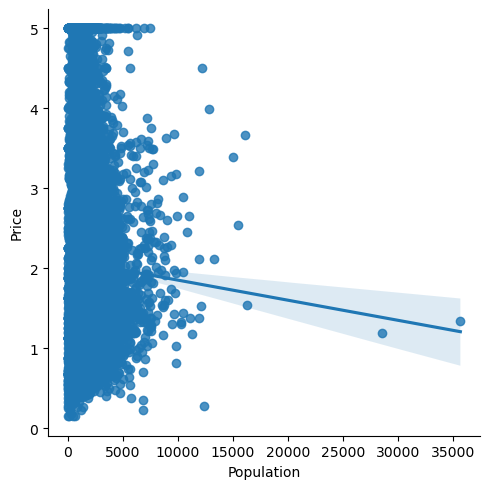

In [21]:
california_housing['exp_Population'] = np.exp((california_housing['Population']))
sns.lmplot(x='exp_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

***
## __Box-Cox Transformation__

In [22]:
from sklearn.preprocessing import PowerTransformer

In [23]:
transformer = PowerTransformer(method='box-cox', standardize=False)

In [24]:
california_housing['box_Population'] = transformer.fit_transform(california_housing[['Population']])

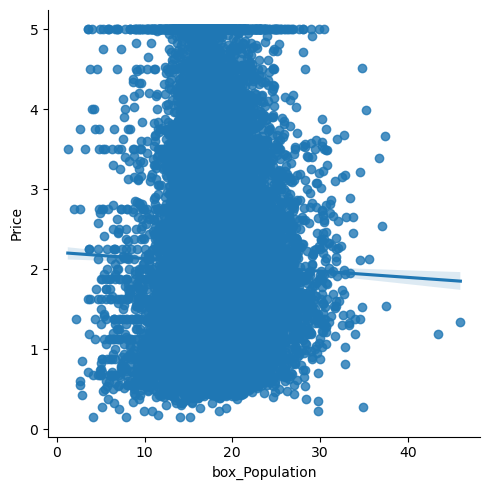

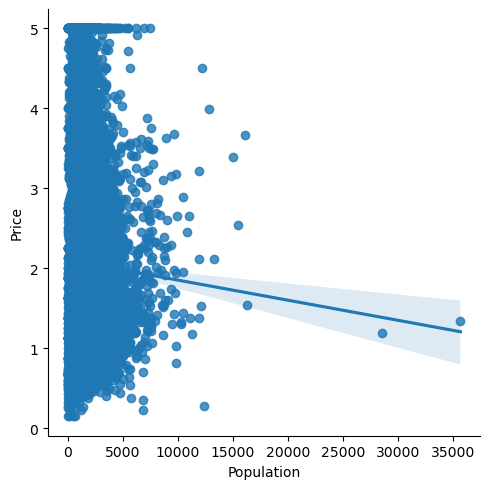

In [25]:
sns.lmplot(x='box_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

***
## __Yeo-Johnson Transformation__

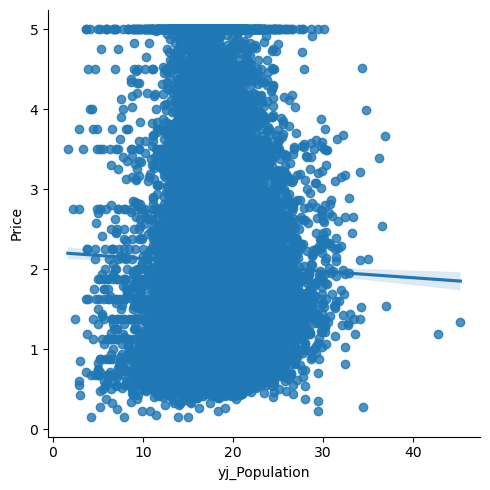

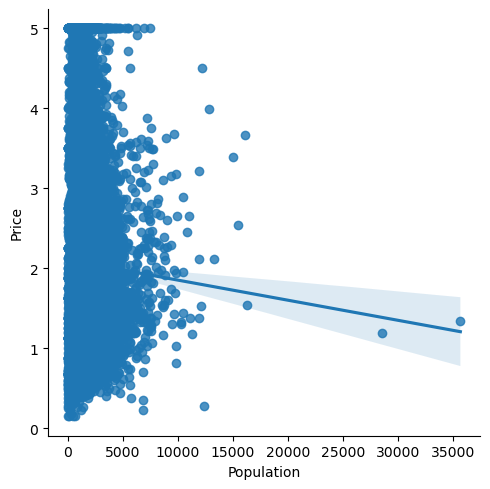

In [26]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

california_housing['yj_Population'] = transformer.fit_transform(california_housing[['Population']])

sns.lmplot(x='yj_Population', y='Price', data=california_housing, order=1)
sns.lmplot(x='Population', y='Price', data=california_housing, order=1)

***
## __Checking Variables Normality__

#### __Histogram__

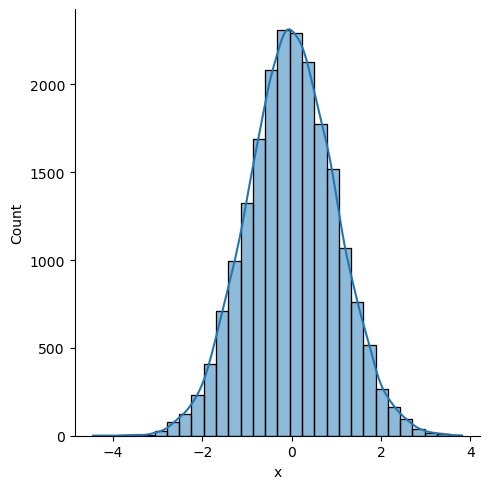

In [27]:
sns.displot(demo_df['x'], bins=30, kde=True)

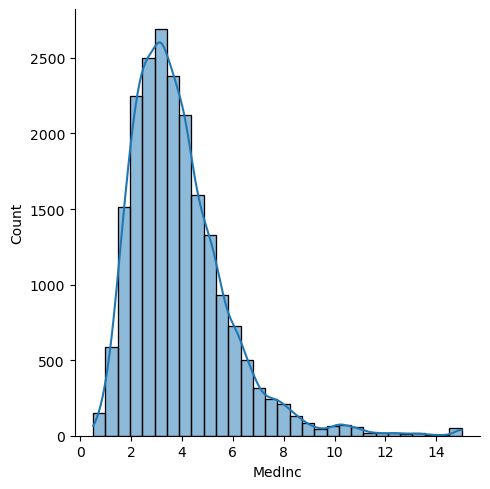

In [28]:
sns.displot(california_housing['MedInc'], bins=30, kde=True)

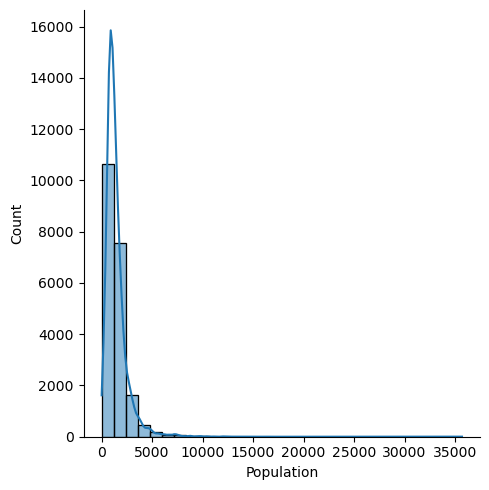

In [29]:
sns.displot(california_housing['Population'], bins=30, kde=True)

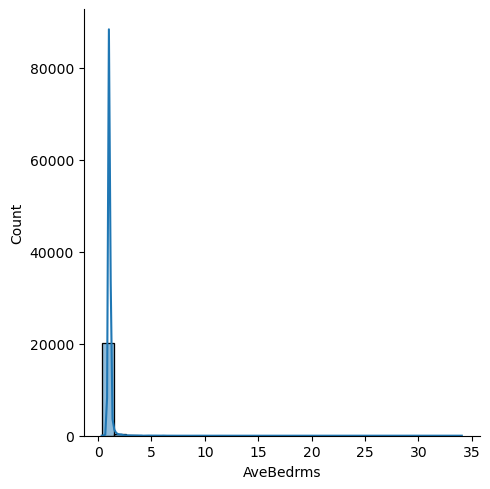

In [30]:
sns.displot(california_housing['AveBedrms'], bins=30, kde=True)

#### __Q-Q Plot__

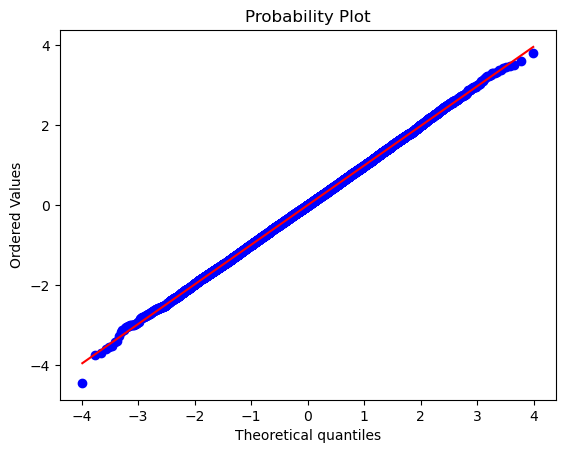

In [31]:
stats.probplot(demo_df['x'], dist='norm', plot=plt)
plt.show()

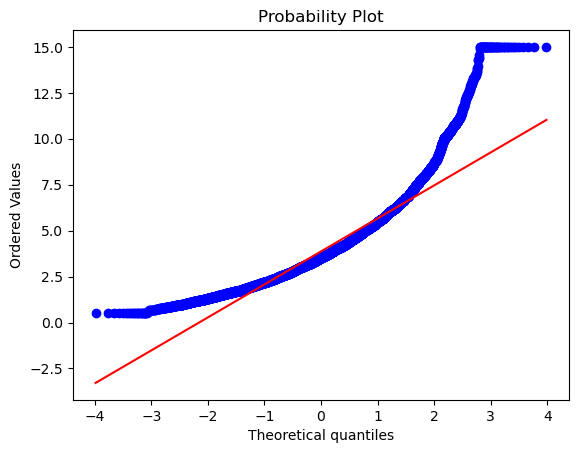

In [32]:
stats.probplot(california_housing['MedInc'], dist='norm', plot=plt)
plt.show()

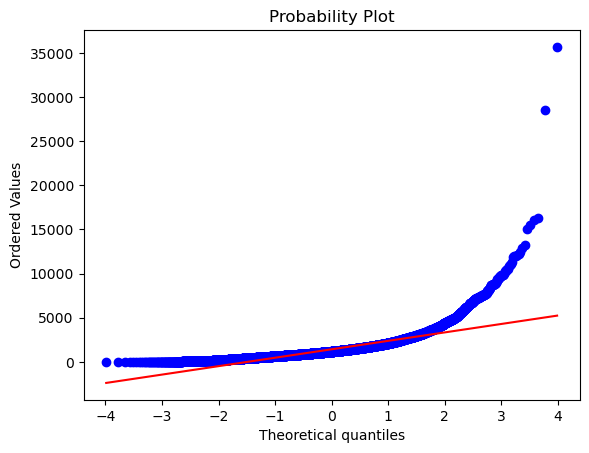

In [33]:
stats.probplot(california_housing['Population'], dist='norm', plot=plt)
plt.show()

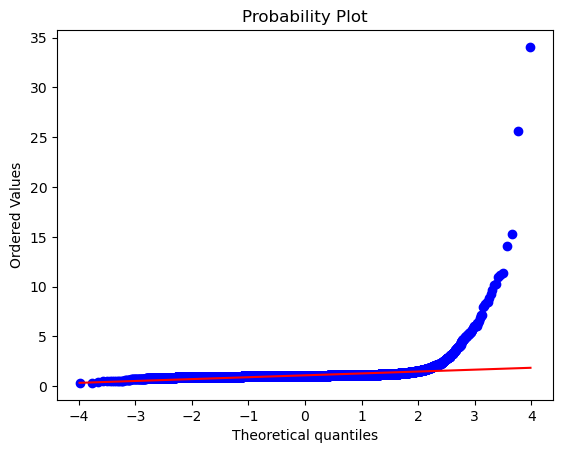

In [34]:
stats.probplot(california_housing['AveBedrms'], dist='norm', plot=plt)
plt.show()

## __Variable Transformation for Normality__

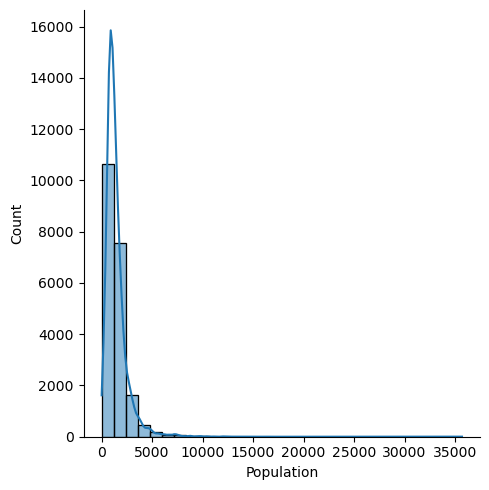

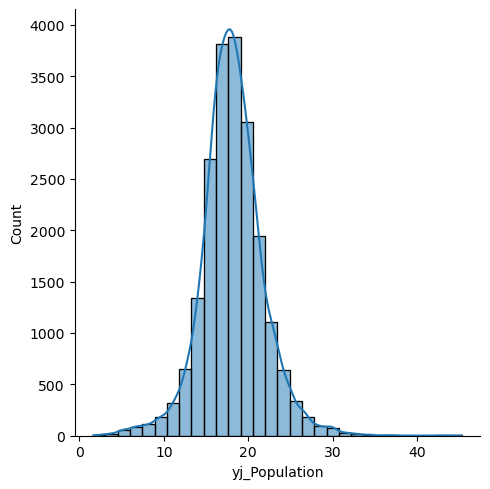

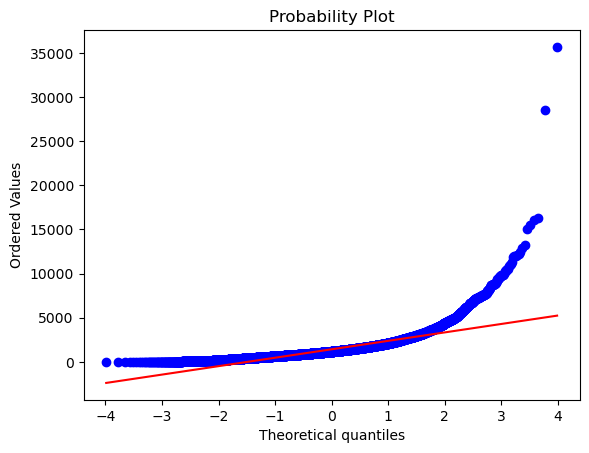

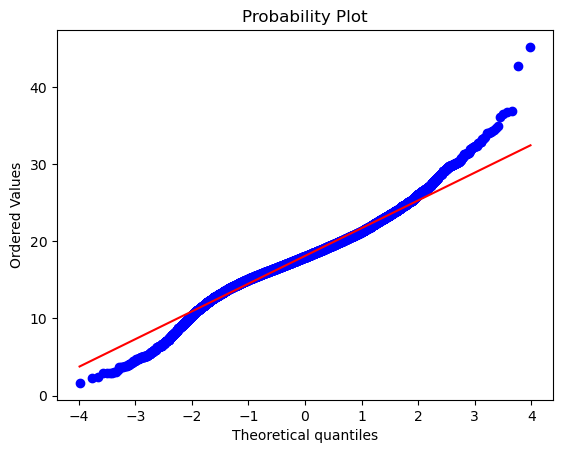

In [35]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
california_housing['yj_Population'] = transformer.fit_transform(california_housing[['Population']])

sns.displot(california_housing['Population'], bins=30, kde=True)
sns.displot(california_housing['yj_Population'], bins=30, kde=True)
plt.figure()

stats.probplot(california_housing['Population'], dist='norm', plot=plt)
plt.show()
stats.probplot(california_housing['yj_Population'], dist='norm', plot=plt)
plt.show()

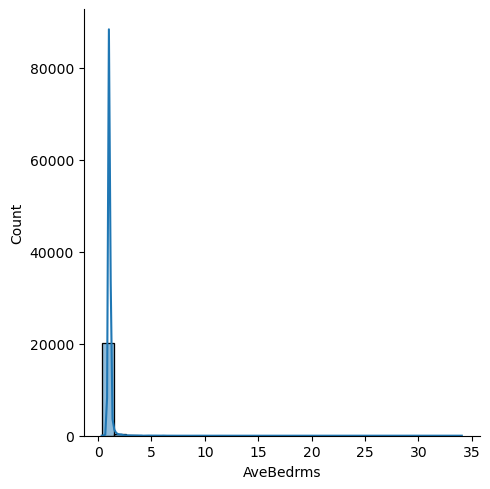

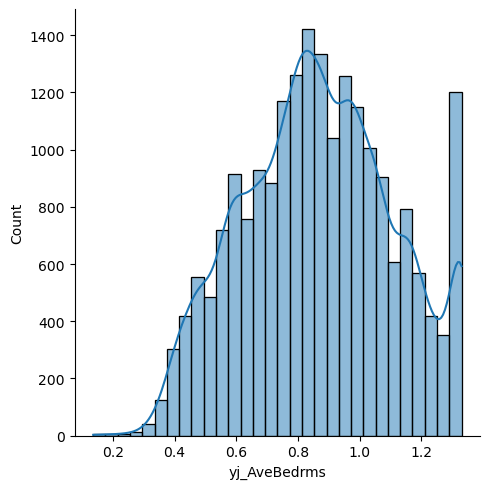

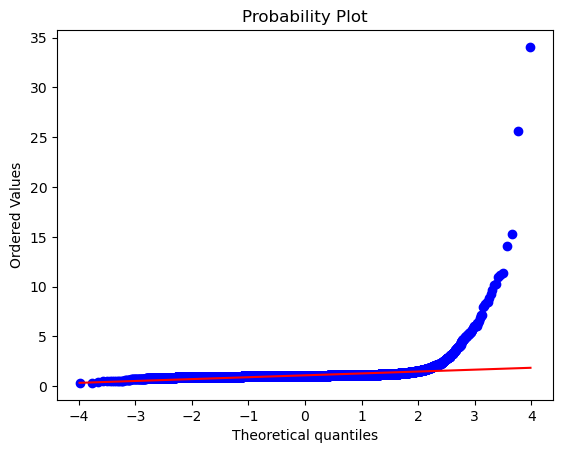

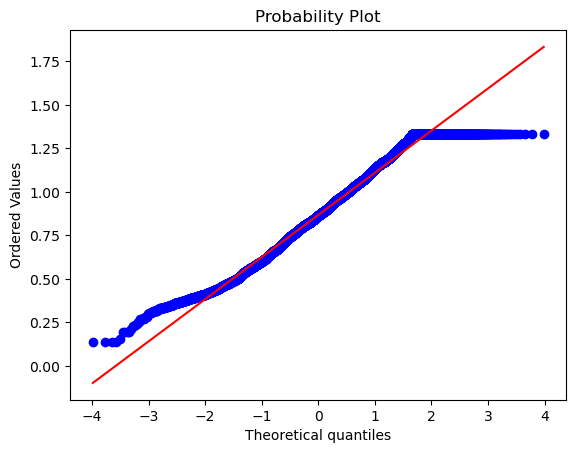

In [40]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
california_housing['yj_AveBedrms'] = transformer.fit_transform(california_housing[['Price']])

sns.displot(california_housing['AveBedrms'], bins=30, kde=True)
sns.displot(california_housing['yj_AveBedrms'], bins=30, kde=True)
plt.figure()

stats.probplot(california_housing['AveBedrms'], dist='norm', plot=plt)
plt.show()
stats.probplot(california_housing['yj_AveBedrms'], dist='norm', plot=plt)
plt.show()

***
## __Homoscedascity__


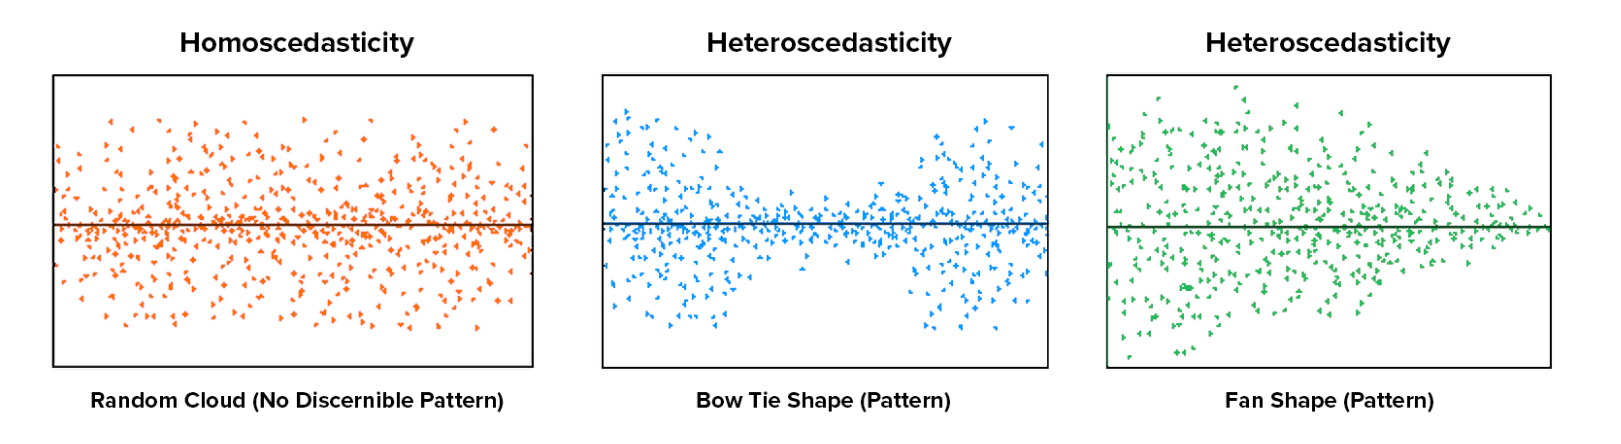

***

In [66]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[['Population']], california_housing['Price'], test_size=0.2, random_state=0)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

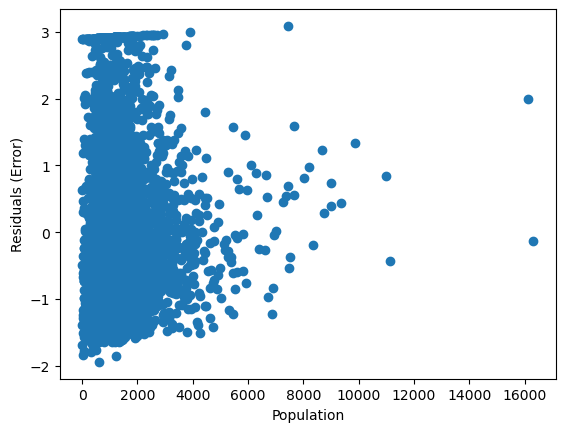

In [68]:
y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('Population')
plt.ylabel('Residuals (Error)')
plt.show()

In [69]:
mean_squared_error(y_test, y_pred)

1.3042488225222022

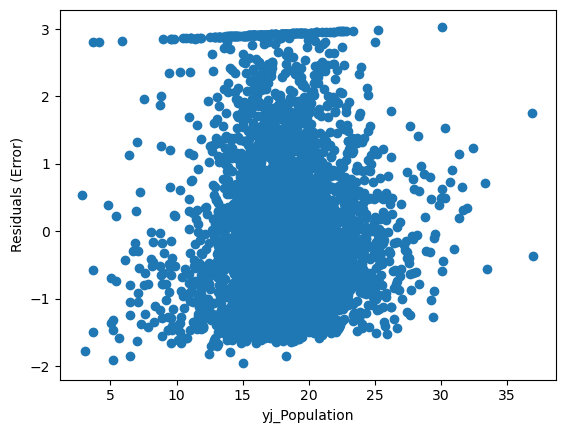

In [55]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[['yj_Population']], california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_Population')
plt.ylabel('Residuals (Error)')
plt.show()

In [56]:
mean_squared_error(y_test, y_pred)

1.3043219937060455

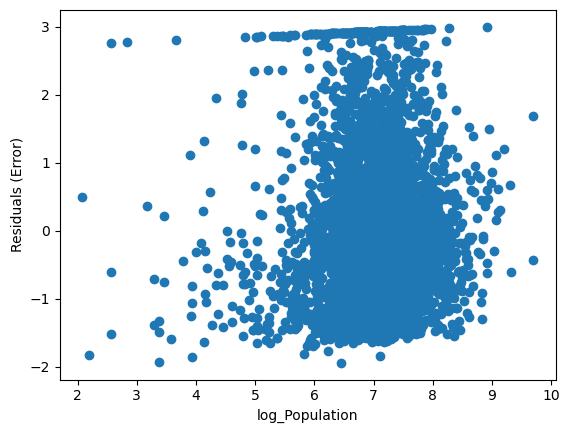

MSE:  1.304475090236133


In [70]:


X_train, X_test, y_train, y_test = train_test_split(np.log(california_housing[['Population']]), california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('log_Population')
plt.ylabel('Residuals (Error)')
plt.show()

print('MSE: ' , mean_squared_error(y_test, y_pred))

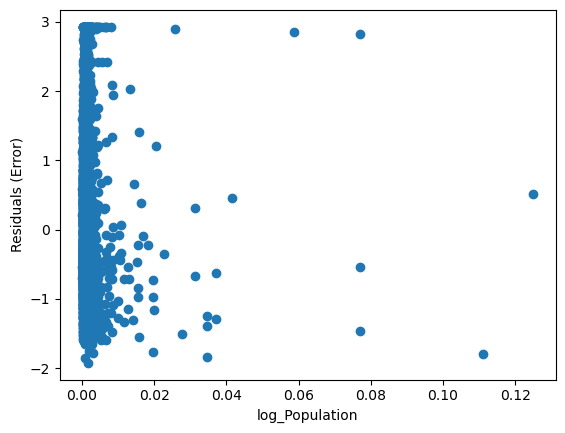

MSE:  1.3044385827526164


In [71]:


X_train, X_test, y_train, y_test = train_test_split(1/(california_housing[['Population']]), california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = y_test-y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('Inv_Population')
plt.ylabel('Residuals (Error)')
plt.show()

print('MSE: ' , mean_squared_error(y_test, y_pred))

***
## __Multicolinearity__

In [72]:
california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,log_MedInc,log_AveBedrms,log_Population,log_AveOccup,sqrt_Population,exp_Population,box_Population,yj_Population,yj_AveBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.119287,0.023530,5.774552,0.938270,17.944358,6.963429e+139,12.308116,12.223224,1.286075
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.116424,-0.028522,7.783641,0.746613,49.000000,inf,22.335341,22.087944,1.180093
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.982022,0.070874,6.206576,1.030426,22.271057,2.570769e+215,14.082654,13.970688,1.171829
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.730434,0.070514,6.324359,0.935287,23.622024,2.169306e+242,14.598635,14.478725,1.157517
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.347086,0.077962,6.336826,0.779998,23.769729,2.378933e+245,14.654092,14.533326,1.158728


In [73]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [74]:
corr_mat = california_housing[features].corr().round(2)
corr_mat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00


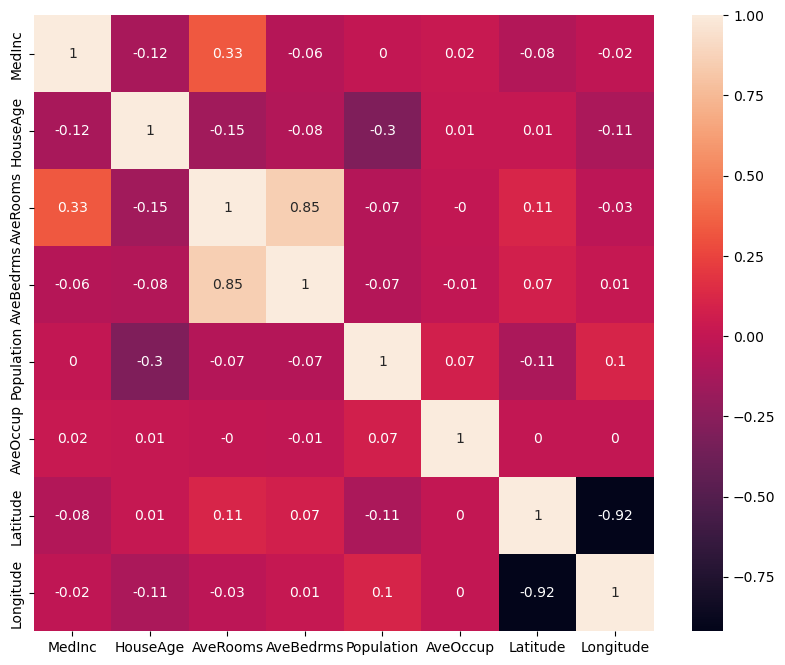

In [77]:
plt.subplots(figsize=(10,8))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

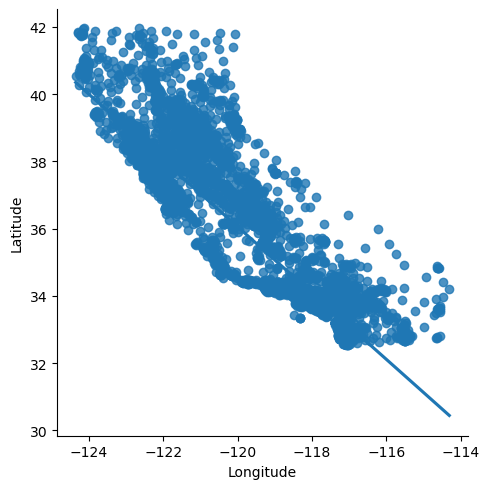

In [78]:
sns.lmplot(x='Longitude', y='Latitude', data=california_housing, order=1)

***
## __Normalization and Standardization__

In [84]:
from sklearn.preprocessing import StandardScaler

In [86]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Without Preprocessing MSE: ' , mean_squared_error(y_test, y_pred))

Without Preprocessing MSE:  0.5289841670367221


In [87]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Standardized MSE: ' , mean_squared_error(y_test, y_pred))

Standardized MSE:  0.5289841670367221


In [90]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Normalized MSE: ' , mean_squared_error(y_test, y_pred))

Normalized MSE:  0.5289841670367221
